In [1]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie

In [2]:
using Revise
using Newtrinos
using Newtrinos.osc

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2), wrong dep version loaded (2))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0x3743e70ec221b5f3, 0x30ca95c923c383aa, 0xd15d5f36981504f4, 0x293704462ef6a8e5, 0xa7e1e66861116956, 0xd820682a4dc69ac0, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [3]:

#STANDARD MODEL

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

p = Newtrinos.get_params(experiments_SM)

[ Info: Loading Katrin data


(m₀ = 0.1, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [4]:

all_priors = Newtrinos.get_priors(experiments_SM)


vars_to_scan = (m₀=31, Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = p.δCP,
    θ₁₂ = p.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ =p.θ₂₃
)
    


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [5]:
likelihood = Newtrinos.generate_likelihood(experiments_SM);

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05Progress:   0%|▏                                        |  ETA: 0:15:50


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], δCP = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], θ₁₂ = [0.587252368744322

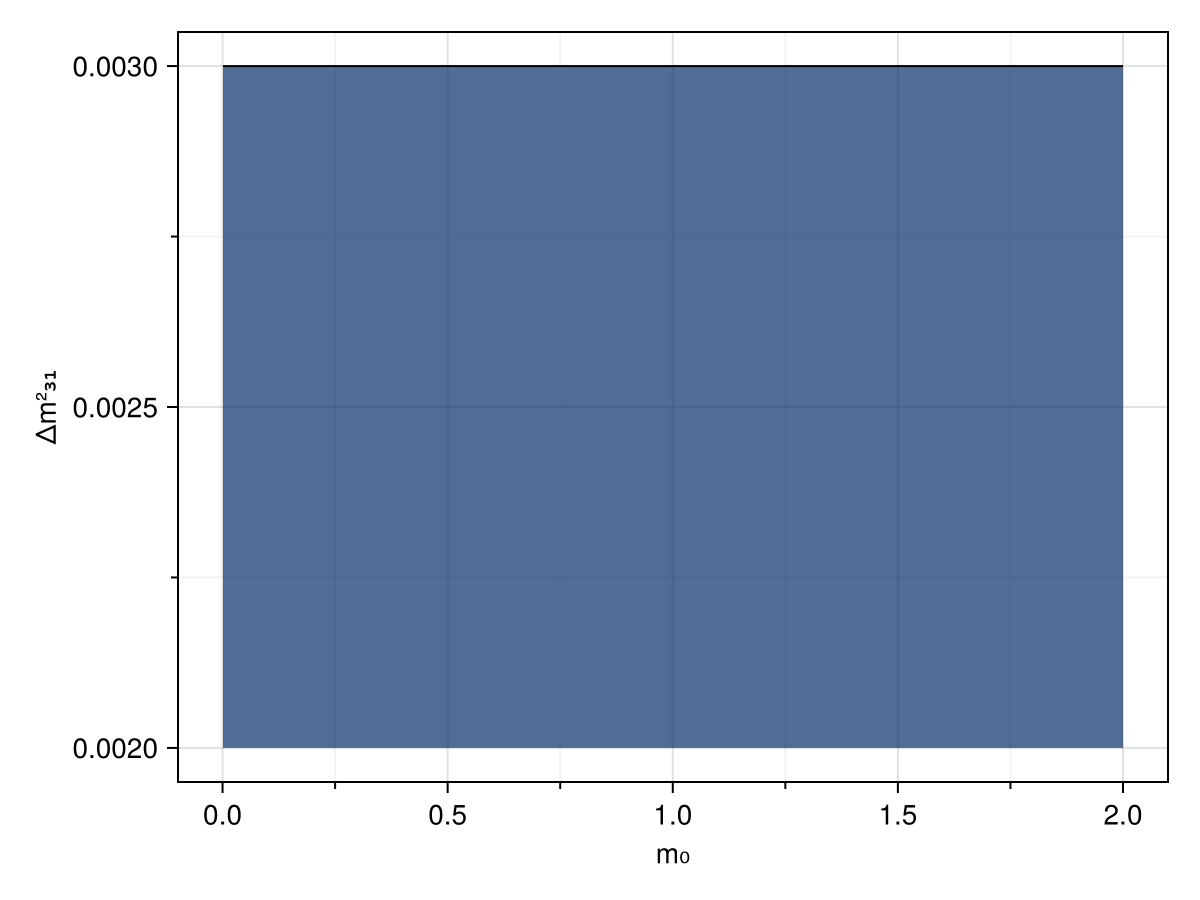

In [6]:
#plot and save the image
img = CairoMakie.plot(result)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_SM.png", img)

In [13]:
println(result.values.log_posterior)

Any[-0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536; -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198072386007536 -0.06198

rindex: 3


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


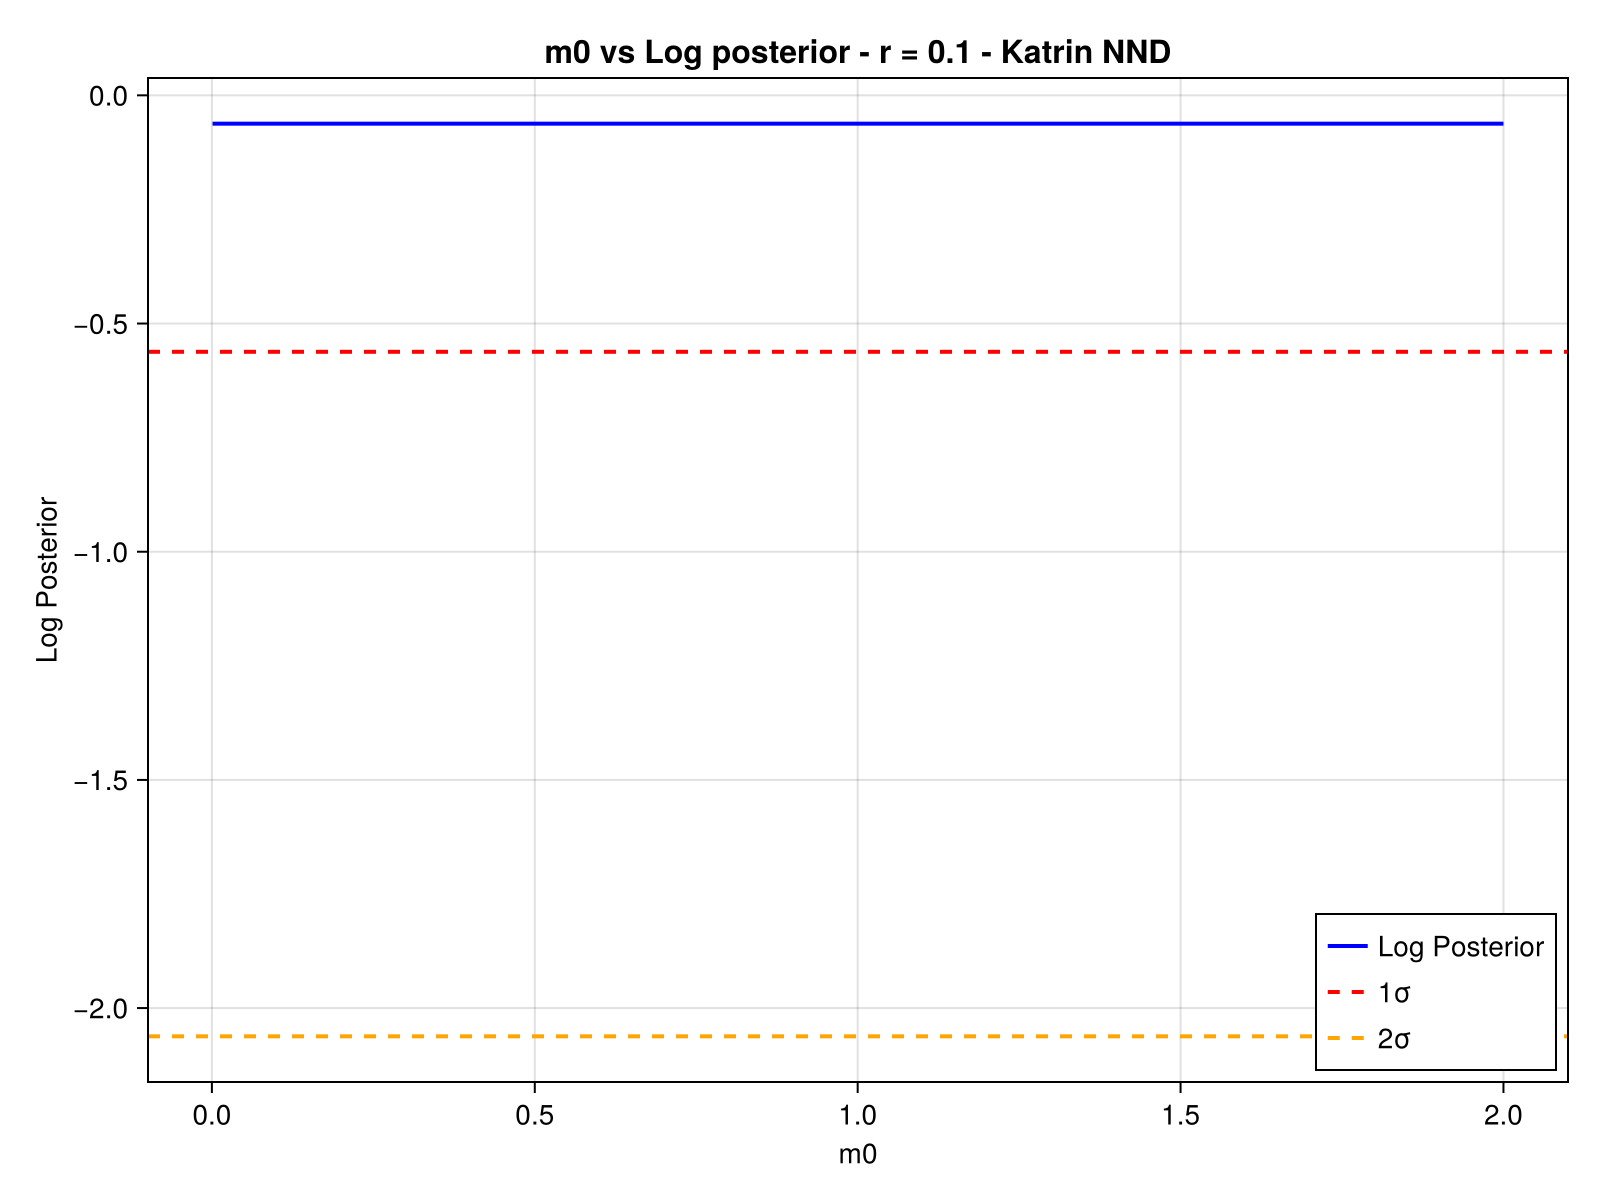

In [7]:
#MODIFYYYY 

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


In [15]:
using Revise
using Newtrinos
using Newtrinos.osc

In [10]:
#NNATURALNESS 
using Revise
using Newtrinos
using Newtrinos.osc


osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);


experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

par= Newtrinos.get_params(experiments)

matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)

[ Info: Loading Katrin data


(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.00020284691844076698, 0.00043089064802666446, 0.007699216690605068, 0.0004046123318141466, 0.000784585417670199, 0.012895281381209713, 0.0006063037357394767  …  0.5006161588430845, 0.019548454045866373, 0.03434373994240374, 0.5059066370431965, 0.01975649052146574, 0.034708427884129436, 0.51

In [11]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = ( m₀ =31, r =31)  

modified_priors = (
    N = all_priors.N,
    m₀ =all_priors.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
)
    


(N = Distributions.Uniform{Float64}(a=3.0, b=100.0), m₀ = Distributions.Uniform{Float64}(a=0.001, b=2.0), r = Distributions.Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Distributions.Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Distributions.Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [12]:
matrix=Newtrinos.osc.get_matrices(osc_cfg.flavour)(par)


(ComplexF64[-0.823559006035511 - 0.0im -0.5481473150987328 - 0.0im … -0.005481546035805803 - 0.0im -0.0007828688274756149 + 0.0012192459593020485im; 0.4124814108162824 + 0.07662837140482405im -0.5130567351441784 + 0.051002582374931445im … -0.005130635570415002 + 0.0005100326053458959im -0.007469152143127304 - 0.0im; … ; -0.0002891831078120794 - 5.372273757882172e-5im 0.00035969461232034675 - 3.575696962545894e-5im … -0.07239085289208125 + 0.007196319987461747im -0.10538622098586639 - 0.0im; 0.00026327162636680145 - 4.66610959552385e-5im -0.000460505719312328 - 3.105685722575349e-5im … 0.09267973620080566 + 0.0062503921541021005im -0.09153361856451647 - 0.0im], [0.0, 7.53e-5, 0.0024752999999999997, 0.00020284691844076698, 0.00043089064802666446, 0.007699216690605068, 0.0004046123318141466, 0.000784585417670199, 0.012895281381209713, 0.0006063037357394767  …  0.5006161588430845, 0.019548454045866373, 0.03434373994240374, 0.5059066370431965, 0.01975649052146574, 0.034708427884129436, 0.51

In [13]:
likelihood_NN = Newtrinos.generate_likelihood(experiments);

result_NN = Newtrinos.scan(likelihood_NN, modified_priors, vars_to_scan, par)

Delta masses exceed threshold: 2451.8655272159394 > 1000
Delta masses exceed threshold: 1.1356932539046272e6 > 1000
Delta masses exceed threshold: 2.543802669437497e6 > 1000
Delta masses exceed threshold: 1.2816326489220506e6 > 1000
Delta masses exceed threshold: 1.4364088183087418e6 > 1000
Delta masses exceed threshold: 2.7598557054363764e6 > 1000
Delta masses exceed threshold: 1.6000217620647005e6 > 1000
Delta masses exceed threshold: 6980.002784757856 > 1000
Delta masses exceed threshold: 287069.2286908211 > 1000

Progress:   0%|▏                                        |  ETA: 0:09:57


Delta masses exceed threshold: 1.7724714801899279e6 > 1000
Delta masses exceed threshold: 2.984721834230184e6 > 1000
Delta masses exceed threshold: 1.9537579726844232e6 > 1000
Delta masses exceed threshold: 3.218401055818917e6 > 1000
Delta masses exceed threshold: 2.1438812395481854e6 > 1000
Delta masses exceed threshold: 2.342841280781218e6 > 1000
Delta masses exceed threshold: 20300.511463209237 > 1000
Delta masses exceed threshold: 3.4608933702025763e6 > 1000
Delta masses exceed threshold: 2.5506380963835167e6 > 1000
Delta masses exceed threshold: 2.7672716863550832e6 > 1000
Delta masses exceed threshold: 2.9927420506959194e6 > 1000
Delta masses exceed threshold: 3.712198777381161e6 > 1000
Delta masses exceed threshold: 42413.39156257009 > 1000
Delta masses exceed threshold: 3.972317277354675e6 > 1000
Delta masses exceed threshold: 3.2270491894060224e6 > 1000
Delta masses exceed threshold: 3.4701931024853936e6 > 1000
Delta masses exceed threshold: 2458.4694302045486 > 1000
Delta ma

Progress:   1%|▌                                        |  ETA: 0:02:13


Delta masses exceed threshold: 73318.64308284037 > 1000
Delta masses exceed threshold: 113016.26602402014 > 1000
Delta masses exceed threshold: 446823.38240446674 > 1000
Delta masses exceed threshold: 20355.189309865793 > 1000
Delta masses exceed threshold: 42527.628736922714 > 1000
Delta masses exceed threshold: 161506.2603861094 > 1000
Delta masses exceed threshold: 73516.12115546377 > 1000
Delta masses exceed threshold: 218788.62616910815 > 1000
Delta masses exceed threshold: 284863.36337301624 > 1000
Delta masses exceed threshold: 113320.66656548905 > 1000
Delta masses exceed threshold: 3.7221737899340317e6 > 1000
Delta masses exceed threshold: 3.98299125175194e6 > 1000
Delta masses exceed threshold: 539991.1431831132 > 1000
Delta masses exceed threshold: 359730.4719978339 > 1000
Delta masses exceed threshold: 443389.95204356103 > 1000
Delta masses exceed threshold: 161941.26496699857 > 1000
Delta masses exceed threshold: 642019.3599096419 > 1000

Progress:   3%|█▍                                       |  ETA: 0:00:53


Delta masses exceed threshold: 2465.0733343930838 > 1000
Delta masses exceed threshold: 7017.602967244266 > 1000
Delta masses exceed threshold: 535841.8035101976 > 1000
Delta masses exceed threshold: 637086.0263977435 > 1000
Delta masses exceed threshold: 747122.620706199 > 1000
Delta masses exceed threshold: 219377.91635999223 > 1000
Delta masses exceed threshold: 285630.62074447004 > 1000
Delta masses exceed threshold: 360699.3781204321 > 1000
Delta masses exceed threshold: 20409.86716645729 > 1000
Delta masses exceed threshold: 42641.865932032175 > 1000
Delta masses exceed threshold: 73713.59926396885 > 1000


Progress:   5%|██                                       |  ETA: 0:00:37

Delta masses exceed threshold: 113625.0671622674 > 1000
Delta masses exceed threshold: 752908.0325840531 > 1000
Delta masses exceed threshold: 865951.5864355641 > 1000
Delta masses exceed threshold: 444584.18848787836 > 1000
Delta masses exceed threshold: 162376.26962692782 > 1000
Delta masses exceed threshold: 872657.1612063469 > 1000
Delta masses exceed threshold: 1.0012667457765226e6 > 1000
Delta masses exceed threshold: 219967.2066579501 > 1000
Delta masses exceed threshold: 1.1387367862945807e6 > 1000
Delta masses exceed threshold: 286397.8782553341 > 1000
Delta masses exceed threshold: 537285.0518468088 > 1000
Delta masses exceed threshold: 638801.9681972233 > 1000
Delta masses exceed threshold: 993572.9235858382 > 1000
Delta masses exceed threshold: 1.1299866321570217e6 > 1000
Delta masses exceed threshold: 1.2751927121491153e6 > 1000
Delta masses exceed threshold: 1.2850672827605219e6 > 1000
Delta masses exceed threshold: 749134.9375391221 > 1000

Progress:   6%|██▋                                      |  ETA: 0:00:30


Delta masses exceed threshold: 1.440258235174345e6 > 1000
Delta masses exceed threshold: 1.429191163562118e6 > 1000
Delta masses exceed threshold: 868283.9598725052 > 1000
Delta masses exceed threshold: 361668.28441908007 > 1000
Delta masses exceed threshold: 445778.42514918785 > 1000
Delta masses exceed threshold: 1.6043096435360503e6 > 1000
Delta masses exceed threshold: 1.59198198639603e6 > 1000
Delta masses exceed threshold: 538728.3004456575 > 1000
Delta masses exceed threshold: 1.7772215078456386e6 > 1000
Delta masses exceed threshold: 640517.9103084888 > 1000
Delta masses exceed threshold: 1.958993828103109e6 > 1000
Delta masses exceed threshold: 751147.2547376821 > 1000
Delta masses exceed threshold: 996249.035197372 > 1000
Delta masses exceed threshold: 2.1496266043084613e6 > 1000
Delta masses exceed threshold: 1.763565180650852e6 > 1000
Delta masses exceed threshold: 1.133030163513723e6 > 1000
Delta masses exceed threshold: 2.3491198364616977e6 > 1000
Delta masses exceed thr

Progress:  11%|████▎                                    |  ETA: 0:00:21

Delta masses exceed threshold: 2471.677239771923 > 1000
Delta masses exceed threshold: 1.2820619781180734e6 > 1000
Delta masses exceed threshold: 2.7533667232386023e6 > 1000
Delta masses exceed threshold: 2.977704146018882e6 > 1000
Delta masses exceed threshold: 2.5446570977379647e6 > 1000
Delta masses exceed threshold: 3.21083394022007e6 > 1000
Delta masses exceed threshold: 2.760782702977673e6 > 1000
Delta masses exceed threshold: 2.9857243612088677e6 > 1000
Delta masses exceed threshold: 3.452756105842167e6 > 1000
Delta masses exceed threshold: 7036.40306358403 > 1000

Progress:  13%|█████▏                                   |  ETA: 0:00:19


Delta masses exceed threshold: 1.4368899953790759e6 > 1000
Delta masses exceed threshold: 3.703470642885173e6 > 1000
Delta masses exceed threshold: 3.2194820724315452e6 > 1000
Delta masses exceed threshold: 20464.545032904058 > 1000
Delta masses exceed threshold: 3.4620558366457066e6 > 1000
Delta masses exceed threshold: 42756.10314773202 > 1000
Delta masses exceed threshold: 1.60055774720644e6 > 1000
Delta masses exceed threshold: 3.962977551349091e6 > 1000
Delta masses exceed threshold: 73911.07740806787 > 1000
Delta masses exceed threshold: 1.7730652336001664e6 > 1000
Delta masses exceed threshold: 113929.46781391164 > 1000
Delta masses exceed threshold: 3.7134456538513517e6 > 1000
Delta masses exceed threshold: 1.9544124545602545e6 > 1000
Delta masses exceed threshold: 3.973651524048483e6 > 1000
Delta masses exceed threshold: 2.1445994100867035e6 > 1000
Delta masses exceed threshold: 2452.6910150235653 > 1000
Delta masses exceed threshold: 6982.35279576201 > 1000
Delta masses exce

Progress:  17%|███████                                  |  ETA: 0:00:14


Delta masses exceed threshold: 359851.5852534826 > 1000
Delta masses exceed threshold: 162430.64521494473 > 1000
Delta masses exceed threshold: 642233.85272904 > 1000
Delta masses exceed threshold: 220040.86795268042 > 1000
Delta masses exceed threshold: 753159.572298947 > 1000
Delta masses exceed threshold: 1.1334106049722857e6 > 1000
Delta masses exceed threshold: 286493.7854539384 > 1000
Delta masses exceed threshold: 1.2790566739495976e6 > 1000
Delta masses exceed threshold: 872948.7080143624 > 1000
Delta masses exceed threshold: 1.4335217561150189e6 > 1000
Delta masses exceed threshold: 1.001601259875285e6 > 1000
Delta masses exceed threshold: 361789.3977187188 > 1000
Delta masses exceed threshold: 443539.2315871744 > 1000
Delta masses exceed threshold: 445927.7047470216 > 1000
Delta masses exceed threshold: 1.5968058514685486e6 > 1000
Delta masses exceed threshold: 536022.2095378609 > 1000
Delta masses exceed threshold: 538908.7065388467 > 1000
Delta masses exceed threshold: 637

Progress:  22%|████████▉                                |  ETA: 0:00:12


Delta masses exceed threshold: 2.3444109195954935e6 > 1000
Delta masses exceed threshold: 1.7641589338588053e6 > 1000
Delta masses exceed threshold: 3.2205630890687266e6 > 1000
Delta masses exceed threshold: 1.94459522797944e6 > 1000
Delta masses exceed threshold: 3.4632183031152403e6 > 1000
Delta masses exceed threshold: 2.1338268537170687e6 > 1000
Delta masses exceed threshold: 2.552346953313109e6 > 1000
Delta masses exceed threshold: 3.7146925303498628e6 > 1000
Delta masses exceed threshold: 2.77561466648745e6 > 1000
Delta masses exceed threshold: 3.0017647959489613e6 > 1000
Delta masses exceed threshold: 2.7691256817942467e6 > 1000
Delta masses exceed threshold: 2.331853811071694e6 > 1000
Delta masses exceed threshold: 2.9947471050389083e6 > 1000
Delta masses exceed threshold: 3.2367783415559796e6 > 1000
Delta masses exceed threshold: 2.538676100043313e6 > 1000
Delta masses exceed threshold: 3.2292112230470916e6 > 1000
Delta masses exceed threshold: 3.480655303308505e6 > 1000

Progress:  26%|██████████▌                              |  ETA: 0:00:11


Delta masses exceed threshold: 2.754293720631926e6 > 1000
Delta masses exceed threshold: 3.4725180358187966e6 > 1000
Delta masses exceed threshold: 3.9749857707725964e6 > 1000
Delta masses exceed threshold: 3.7333956812065383e6 > 1000
Delta masses exceed threshold: 2460.1204061395674 > 1000
Delta masses exceed threshold: 3.7246675433540237e6 > 1000
Delta masses exceed threshold: 7003.502897211703 > 1000
Delta masses exceed threshold: 3.9949994752500816e6 > 1000
Delta masses exceed threshold: 3.9856597456527753e6 > 1000
Delta masses exceed threshold: 2472.502728027496 > 1000
Delta masses exceed threshold: 2466.724310626574 > 1000


Progress:  27%|██████████▉                              |  ETA: 0:00:11

Delta masses exceed threshold: 2.978706672837536e6 > 1000
Delta masses exceed threshold: 20368.858773085398 > 1000
Delta masses exceed threshold: 7038.753075863407 > 1000
Delta masses exceed threshold: 7022.302991012585 > 1000
Delta masses exceed threshold: 20423.536632148127 > 1000
Delta masses exceed threshold: 42556.18803376066 > 1000
Delta masses exceed threshold: 20471.37976689892 > 1000
Delta masses exceed threshold: 42670.42523403321 > 1000
Delta masses exceed threshold: 73565.49067923744 > 1000
Delta masses exceed threshold: 73762.96879666777 > 1000
Delta masses exceed threshold: 42770.382801134045 > 1000
Delta masses exceed threshold: 3.2119149566601394e6 > 1000

Progress:  28%|███████████▌                             |  ETA: 0:00:11


Delta masses exceed threshold: 113396.76670951581 > 1000
Delta masses exceed threshold: 113701.1673200519 > 1000
Delta masses exceed threshold: 73935.76217856872 > 1000
Delta masses exceed threshold: 113967.51789920304 > 1000
Delta masses exceed threshold: 162485.0208041856 > 1000
Delta masses exceed threshold: 162050.01612459577 > 1000
Delta masses exceed threshold: 162865.649963037 > 1000
Delta masses exceed threshold: 220630.15837007054 > 1000
Delta masses exceed threshold: 220114.52924906882 > 1000
Delta masses exceed threshold: 219525.23892447728 > 1000
Delta masses exceed threshold: 287261.0431203036 > 1000
Delta masses exceed threshold: 285822.43510916026 > 1000
Delta masses exceed threshold: 362758.3042137363 > 1000
Delta masses exceed threshold: 286589.6926547015 > 1000
Delta masses exceed threshold: 447121.9416503687 > 1000
Delta masses exceed threshold: 3.4539185720997374e6 > 1000
Delta masses exceed threshold: 360941.60467864486 > 1000
Delta masses exceed threshold: 3.7047

Progress:  32%|█████████████                            |  ETA: 0:00:11


Delta masses exceed threshold: 2453.51650285007 > 1000
Delta masses exceed threshold: 1.001935773981524e6 > 1000
Delta masses exceed threshold: 639230.953695908 > 1000
Delta masses exceed threshold: 6984.70280681991 > 1000
Delta masses exceed threshold: 749638.0168045987 > 1000
Delta masses exceed threshold: 640946.8958847276 > 1000
Delta masses exceed threshold: 20314.1809239376 > 1000
Delta masses exceed threshold: 42441.950854203154 > 1000
Delta masses exceed threshold: 751650.334094108 > 1000
Delta masses exceed threshold: 1.1394976694773536e6 > 1000
Delta masses exceed threshold: 871199.427264238 > 1000
Delta masses exceed threshold: 868867.0532980914 > 1000
Delta masses exceed threshold: 73368.01259761651 > 1000
Delta masses exceed threshold: 996918.0631763849 > 1000
Delta masses exceed threshold: 999594.175395117 > 1000
Delta masses exceed threshold: 1.2859259413163834e6 > 1000
Delta masses exceed threshold: 1.1368345784867457e6 > 1000
Delta masses exceed threshold: 1.441220589

Progress:  37%|███████████████                          |  ETA: 0:00:09


Delta masses exceed threshold: 2.140290387098885e6 > 1000
Delta masses exceed threshold: 2.559182381799179e6 > 1000
Delta masses exceed threshold: 2.338917184055593e6 > 1000
Delta masses exceed threshold: 747625.6998799902 > 1000
Delta masses exceed threshold: 2.7765416643838044e6 > 1000
Delta masses exceed threshold: 2.5463659543971005e6 > 1000
Delta masses exceed threshold: 3.0027673233116316e6 > 1000
Delta masses exceed threshold: 2.3451957390291356e6 > 1000
Delta masses exceed threshold: 866534.6797548824 > 1000
Delta masses exceed threshold: 2.7626366981234094e6 > 1000
Delta masses exceed threshold: 3.2378593585826573e6 > 1000
Delta masses exceed threshold: 994241.9514429218 > 1000
Delta masses exceed threshold: 1.130747514944109e6 > 1000
Delta masses exceed threshold: 3.481817770196882e6 > 1000
Delta masses exceed threshold: 1.2760513702584447e6 > 1000
Delta masses exceed threshold: 1.430153517385928e6 > 1000
Delta masses exceed threshold: 2.5532013818067606e6 > 1000
Delta masse

Progress:  38%|███████████████▌                         |  ETA: 0:00:09

Delta masses exceed threshold: 3.996333722454932e6 > 1000
Delta masses exceed threshold: 3.715939406876663e6 > 1000
Delta masses exceed threshold: 2.1345450240273387e6 > 1000
Delta masses exceed threshold: 2473.3282163015024 > 1000
Delta masses exceed threshold: 2.3326386302205627e6 > 1000
Delta masses exceed threshold: 7041.10308819526 > 1000
Delta masses exceed threshold: 2.5395305282269325e6 > 1000
Delta masses exceed threshold: 3.976320017526982e6 > 1000


Progress:  40%|████████████████▍                        |  ETA: 0:00:09

Delta masses exceed threshold: 3.725914420106129e6 > 1000
Delta masses exceed threshold: 2.75522071804645e6 > 1000
Delta masses exceed threshold: 20478.2145010464 > 1000
Delta masses exceed threshold: 2460.9458941351504 > 1000
Delta masses exceed threshold: 2.979709199679117e6 > 1000
Delta masses exceed threshold: 7005.852908750938 > 1000
Delta masses exceed threshold: 3.9869939926482528e6 > 1000
Delta masses exceed threshold: 20375.69350492764 > 1000
Delta masses exceed threshold: 42570.46768266527 > 1000
Delta masses exceed threshold: 2467.5497987711697 > 1000
Delta masses exceed threshold: 3.2129959731249316e6 > 1000
Delta masses exceed threshold: 3.455081038383893e6 > 1000
Delta masses exceed threshold: 3.705964395456002e6 > 1000
Delta masses exceed threshold: 7024.653002976031 > 1000
Delta masses exceed threshold: 42784.66245485494 > 1000
Delta masses exceed threshold: 20430.371365224135 > 1000
Delta masses exceed threshold: 73960.44694962082 > 1000
Delta masses exceed threshold: 

Progress:  41%|████████████████▊                        |  ETA: 0:00:09

Delta masses exceed threshold: 220703.8196796629 > 1000
Delta masses exceed threshold: 445032.0272105342 > 1000
Delta masses exceed threshold: 73787.65356385006 > 1000
Delta masses exceed threshold: 20321.015654536117 > 1000
Delta masses exceed threshold: 287356.9503382583 > 1000
Delta masses exceed threshold: 113739.21740022789 > 1000
Delta masses exceed threshold: 162539.39639464903 > 1000
Delta masses exceed threshold: 537826.2700407591 > 1000
Delta masses exceed threshold: 362879.4175378111 > 1000


Progress:  43%|█████████████████▊                       |  ETA: 0:00:08

Delta masses exceed threshold: 220188.19054711337 > 1000
Delta masses exceed threshold: 42456.23050050927 > 1000
Delta masses exceed threshold: 286685.5998576209 > 1000
Delta masses exceed threshold: 73392.69735585092 > 1000
Delta masses exceed threshold: 362031.6243261717 > 1000
Delta masses exceed threshold: 113130.41622056114 > 1000
Delta masses exceed threshold: 447271.22127832135 > 1000
Delta masses exceed threshold: 639445.4464525449 > 1000
Delta masses exceed threshold: 161669.38709463994 > 1000
Delta masses exceed threshold: 749889.5564458916 > 1000
Delta masses exceed threshold: 219009.60997808725 > 1000
Delta masses exceed threshold: 446226.2639527658 > 1000
Delta masses exceed threshold: 285151.084870903 > 1000
Delta masses exceed threshold: 540532.3615597889 > 1000
Delta masses exceed threshold: 539269.5187374031 > 1000
Delta masses exceed threshold: 642662.8383822138 > 1000
Delta masses exceed threshold: 641161.3886800836 > 1000
Delta masses exceed threshold: 869158.600020

Progress:  59%|████████████████████████▎                |  ETA: 0:00:05


Delta masses exceed threshold: 642877.3312159792 > 1000
Delta masses exceed threshold: 161723.76266663417 > 1000
Delta masses exceed threshold: 219083.27125111208 > 1000
Delta masses exceed threshold: 445181.30679151847 > 1000
Delta masses exceed threshold: 752153.413473158 > 1000
Delta masses exceed threshold: 871782.5208214612 > 1000
Delta masses exceed threshold: 285246.9920412467 > 1000
Delta masses exceed threshold: 753914.1914773389 > 1000
Delta masses exceed threshold: 538006.6761135856 > 1000
Delta masses exceed threshold: 639659.93921404 > 1000
Delta masses exceed threshold: 360214.92503703816 > 1000
Delta masses exceed threshold: 443987.0702384864 > 1000
Delta masses exceed threshold: 873823.3484774801 > 1000
Delta masses exceed threshold: 1.0026048022164019e6 > 1000
Delta masses exceed threshold: 1.0002632035251673e6 > 1000
Delta masses exceed threshold: 1.1402585526941048e6 > 1000
Delta masses exceed threshold: 1.2867845999105896e6 > 1000
Delta masses exceed threshold: 750

Progress:  62%|█████████████████████████▍               |  ETA: 0:00:05

Delta masses exceed threshold: 3.484142704051478e6 > 1000
Delta masses exceed threshold: 2.346765377949344e6 > 1000
Delta masses exceed threshold: 2.5549102388516814e6 > 1000
Delta masses exceed threshold: 3.737136312133336e6 > 1000
Delta masses exceed threshold: 1.7706902200396187e6 > 1000
Delta masses exceed threshold: 1.765940193564092e6 > 1000
Delta masses exceed threshold: 2.771906675109422e6 > 1000
Delta masses exceed threshold: 1.946558673027765e6 > 1000
Delta masses exceed threshold: 2.9977546867225673e6 > 1000
Delta masses exceed threshold: 2.135981364697094e6 > 1000
Delta masses exceed threshold: 3.999002216953977e6 > 1000
Delta masses exceed threshold: 3.232454273691116e6 > 1000
Delta masses exceed threshold: 3.476005436015067e6 > 1000
Delta masses exceed threshold: 2474.9791929047315 > 1000
Delta masses exceed threshold: 2.334208268572082e6 > 1000
Delta masses exceed threshold: 2.541239384652725e6 > 1000
Delta masses exceed threshold: 1.9517945271455592e6 > 1000
Delta masse

Progress:  68%|███████████████████████████▉             |  ETA: 0:00:04


Delta masses exceed threshold: 2455.992966442684 > 1000
Delta masses exceed threshold: 220335.51314816513 > 1000
Delta masses exceed threshold: 447569.7805442119 > 1000
Delta masses exceed threshold: 6991.75284031558 > 1000
Delta masses exceed threshold: 286877.4142699211 > 1000
Delta masses exceed threshold: 540893.1738310329 > 1000
Delta masses exceed threshold: 7010.552931989003 > 1000
Delta masses exceed threshold: 643091.8240545247 > 1000
Delta masses exceed threshold: 20389.362969076294 > 1000
Delta masses exceed threshold: 42599.026981444265 > 1000
Delta masses exceed threshold: 20334.68511620103 > 1000
Delta masses exceed threshold: 73639.54496909287 > 1000
Delta masses exceed threshold: 42484.789794099044 > 1000
Delta masses exceed threshold: 754165.7312146876 > 1000
Delta masses exceed threshold: 362273.8509445072 > 1000
Delta masses exceed threshold: 446524.82317192346 > 1000
Delta masses exceed threshold: 874114.8953115216 > 1000
Delta masses exceed threshold: 539630.33095

Progress:  72%|█████████████████████████████▌           |  ETA: 0:00:03


Delta masses exceed threshold: 285342.89921377733 > 1000
Delta masses exceed threshold: 360336.0383037507 > 1000
Delta masses exceed threshold: 1.4426641210655659e6 > 1000
Delta masses exceed threshold: 1.6069895698457542e6 > 1000
Delta masses exceed threshold: 1.2842086242430797e6 > 1000

Progress:  73%|██████████████████████████████▏          |  ETA: 0:00:03


Delta masses exceed threshold: 444136.34979573655 > 1000
Delta masses exceed threshold: 1.4392958808931368e6 > 1000
Delta masses exceed threshold: 536743.833689735 > 1000
Delta masses exceed threshold: 869741.6934860159 > 1000
Delta masses exceed threshold: 997921.6052017515 > 1000
Delta masses exceed threshold: 638158.4899857459 > 1000
Delta masses exceed threshold: 1.780190275562614e6 > 1000
Delta masses exceed threshold: 1.9622662382161443e6 > 1000
Delta masses exceed threshold: 1.6032376730960235e6 > 1000
Delta masses exceed threshold: 748380.3186837694 > 1000
Delta masses exceed threshold: 1.776034000851741e6 > 1000
Delta masses exceed threshold: 867409.3197838056 > 1000
Delta masses exceed threshold: 1.1349323708927678e6 > 1000
Delta masses exceed threshold: 1.2807739905590652e6 > 1000
Delta masses exceed threshold: 995245.493285854 > 1000
Delta masses exceed threshold: 2.153217457806345e6 > 1000
Delta masses exceed threshold: 1.9576848641602884e6 > 1000
Delta masses exceed thre

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:02


Delta masses exceed threshold: 2.136699535056545e6 > 1000
Delta masses exceed threshold: 3.738383189164542e6 > 1000
Delta masses exceed threshold: 2.3349930877746954e6 > 1000
Delta masses exceed threshold: 4.000336464248113e6 > 1000
Delta masses exceed threshold: 2.548929239531005e6 > 1000
Delta masses exceed threshold: 2475.8046812339185 > 1000
Delta masses exceed threshold: 2.5420938128948566e6 > 1000
Delta masses exceed threshold: 2.765417690999547e6 > 1000
Delta masses exceed threshold: 7048.153125505101 > 1000
Delta masses exceed threshold: 2.9987572139954777e6 > 1000
Delta masses exceed threshold: 2.9907369964433713e6 > 1000
Delta masses exceed threshold: 3.233535290621006e6 > 1000
Delta masses exceed threshold: 2.75800171041703e6 > 1000
Delta masses exceed threshold: 20498.718704402898 > 1000
Delta masses exceed threshold: 42827.50141792732 > 1000
Delta masses exceed threshold: 74034.50126607831 > 1000
Delta masses exceed threshold: 3.4771679027993637e6 > 1000
Delta masses exce

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:02


Delta masses exceed threshold: 643306.3168978444 > 1000
Delta masses exceed threshold: 220409.17445116857 > 1000
Delta masses exceed threshold: 286973.32147929695 > 1000
Delta masses exceed threshold: 754417.270957635 > 1000
Delta masses exceed threshold: 874406.4421520523 > 1000
Delta masses exceed threshold: 1.0032738304810957e6 > 1000
Delta masses exceed threshold: 42499.069441382075 > 1000
Delta masses exceed threshold: 362394.96425774856 > 1000
Delta masses exceed threshold: 1.1410194359447658e6 > 1000
Delta masses exceed threshold: 219819.8840734693 > 1000
Delta masses exceed threshold: 1.287643258543063e6 > 1000
Delta masses exceed threshold: 73466.75163393274 > 1000
Delta masses exceed threshold: 1.4431452982759867e6 > 1000
Delta masses exceed threshold: 113244.56642491918 > 1000
Delta masses exceed threshold: 1.6075255551435365e6 > 1000
Delta masses exceed threshold: 161832.51381434142 > 1000


Progress:  83%|██████████████████████████████████       |  ETA: 0:00:02

Delta masses exceed threshold: 219230.59380219938 > 1000
Delta masses exceed threshold: 446674.10278652323 > 1000
Delta masses exceed threshold: 285438.80638849305 > 1000
Delta masses exceed threshold: 539810.7370656211 > 1000
Delta masses exceed threshold: 360457.15157322254 > 1000
Delta masses exceed threshold: 286206.06386460934 > 1000
Delta masses exceed threshold: 361426.0578279904 > 1000
Delta masses exceed threshold: 1.7807840291457134e6 > 1000
Delta masses exceed threshold: 1.962920720282517e6 > 1000
Delta masses exceed threshold: 641804.8670950418 > 1000
Delta masses exceed threshold: 444285.62935638777 > 1000
Delta masses exceed threshold: 2.1539356285539465e6 > 1000
Delta masses exceed threshold: 445479.86596361233 > 1000
Delta masses exceed threshold: 536924.2397379888 > 1000
Delta masses exceed threshold: 2.353828753960004e6 > 1000
Delta masses exceed threshold: 538367.4882714752 > 1000
Delta masses exceed threshold: 640088.9247515788 > 1000
Delta masses exceed threshold: 

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:02


Delta masses exceed threshold: 750644.1754039235 > 1000
Delta masses exceed threshold: 867700.8664734063 > 1000
Delta masses exceed threshold: 870033.2402285092 > 1000
Delta masses exceed threshold: 3.4864676380096865e6 > 1000
Delta masses exceed threshold: 1.2846379534969924e6 > 1000
Delta masses exceed threshold: 3.739630066223502e6 > 1000
Delta masses exceed threshold: 995580.0072487498 > 1000
Delta masses exceed threshold: 998256.1192253353 > 1000
Delta masses exceed threshold: 1.439777058028352e6 > 1000
Delta masses exceed threshold: 1.1353128123944025e6 > 1000
Delta masses exceed threshold: 1.1322692806225293e6 > 1000
Delta masses exceed threshold: 1.603773658310034e6 > 1000
Delta masses exceed threshold: 1.281203319735711e6 > 1000
Delta masses exceed threshold: 1.2777686865947451e6 > 1000
Delta masses exceed threshold: 1.4359276412492602e6 > 1000
Delta masses exceed threshold: 1.4320782251653962e6 > 1000
Delta masses exceed threshold: 1.59948577693505e6 > 1000
Delta masses exce

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:01


Delta masses exceed threshold: 74059.18603932943 > 1000
Delta masses exceed threshold: 2.5429482411564547e6 > 1000
Delta masses exceed threshold: 114157.7683383867 > 1000
Delta masses exceed threshold: 163137.52797009208 > 1000
Delta masses exceed threshold: 3.4690306358580026e6 > 1000
Delta masses exceed threshold: 220998.4649344456 > 1000
Delta masses exceed threshold: 2.7589287079161555e6 > 1000
Delta masses exceed threshold: 287740.5792314471 > 1000
Delta masses exceed threshold: 2.983719307274294e6 > 1000
Delta masses exceed threshold: 3.720926913266201e6 > 1000
Delta masses exceed threshold: 3.7309019273946304e6 > 1000
Delta masses exceed threshold: 363363.8708610968 > 1000

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:01


Delta masses exceed threshold: 3.9923309809298688e6 > 1000
Delta masses exceed threshold: 2470.8517515348 > 1000
Delta masses exceed threshold: 447868.3398233946 > 1000
Delta masses exceed threshold: 3.2173200392308673e6 > 1000
Delta masses exceed threshold: 3.9816570048466427e6 > 1000
Delta masses exceed threshold: 3.4597309037858755e6 > 1000
Delta masses exceed threshold: 2464.2478463042235 > 1000
Delta masses exceed threshold: 3.7109519009393193e6 > 1000
Delta masses exceed threshold: 7015.25295543949 > 1000
Delta masses exceed threshold: 541253.9861183405 > 1000
Delta masses exceed threshold: 7034.053051357177 > 1000
Delta masses exceed threshold: 20457.710299061957 > 1000
Delta masses exceed threshold: 643520.8097459343 > 1000
Delta masses exceed threshold: 20403.03243384275 > 1000
Delta masses exceed threshold: 42627.58628151402 > 1000
Delta masses exceed threshold: 3.9709830306912013e6 > 1000
Delta masses exceed threshold: 754668.8107061764 > 1000
Delta masses exceed threshold:

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:00

Delta masses exceed threshold: 750895.7150679661 > 1000
Delta masses exceed threshold: 748883.3979149505 > 1000
Delta masses exceed threshold: 867992.4131696415 > 1000
Delta masses exceed threshold: 870324.7869775855 > 1000
Delta masses exceed threshold: 998590.6332564723 > 1000
Delta masses exceed threshold: 995914.5212192583 > 1000
Delta masses exceed threshold: 1.1326497220638013e6 > 1000
Delta masses exceed threshold: 3.007779960460301e6 > 1000
Delta masses exceed threshold: 1.2781980157032714e6 > 1000
Delta masses exceed threshold: 3.243264444077617e6 > 1000
Delta masses exceed threshold: 1.4325594021376676e6 > 1000


Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


Delta masses exceed threshold: 1.5957338813669896e6 > 1000
Delta masses exceed threshold: 1.7677214533912386e6 > 1000
Delta masses exceed threshold: 1.9485221182104137e6 > 1000
Delta masses exceed threshold: 3.48763010502758e6 > 1000
Delta masses exceed threshold: 3.7408769433101914e6 > 1000
Delta masses exceed threshold: 4.0030049589254525e6 > 1000
Delta masses exceed threshold: 2.1381358758245143e6 > 1000
Delta masses exceed threshold: 2.336562726233543e6 > 1000


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0]), (N = [100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0; … ; 100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; … ; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 7.53e-5 7.53e-5], Δm²₃₁ = [0.0024752999999999997 0.0024752999999999997 … 0.00247529999999

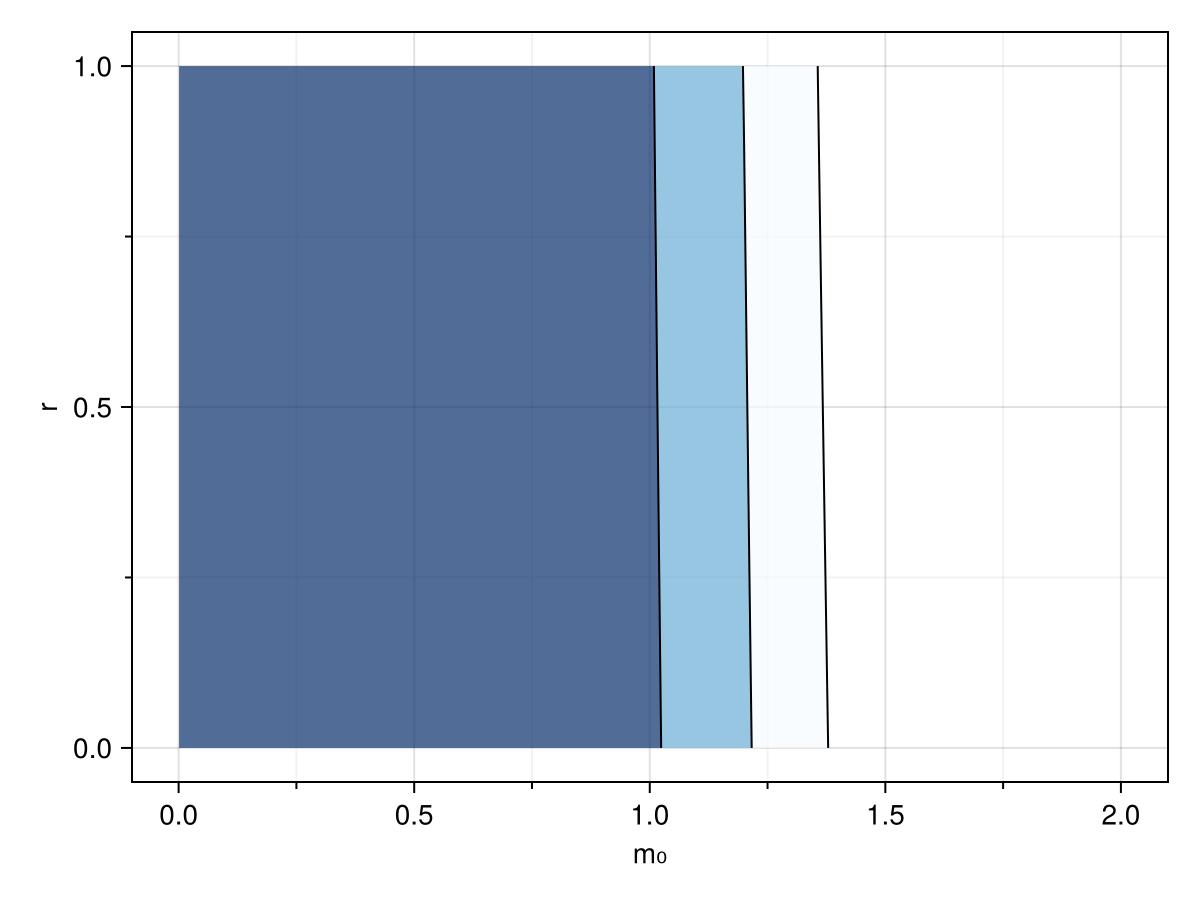

In [14]:
#plot and save the image
using CairoMakie
img = CairoMakie.plot(result_NN)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_rm0_NND_N1000.png", img)

In [12]:
#plot the logposterior value vs r

#value of r fixed
rfixed = 0.1
rmax=1
rindex = round(Int, 31/rmax* rfixed)
println("rindex: ", rindex)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[rindex ,: ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[ rindex,: ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "m0",
    ylabel = "Log Posterior",
    title = "m0 vs Log posterior - r = $rfixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.m₀, result.values.log_posterior[rindex , :],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_m0Logpost_NND_N=50_r=$rfixed.png", fig)


rindex: 3


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


LoadError: type NamedTuple has no field m₀

m0index: 16


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/dYDv2/src/scenes.jl:238


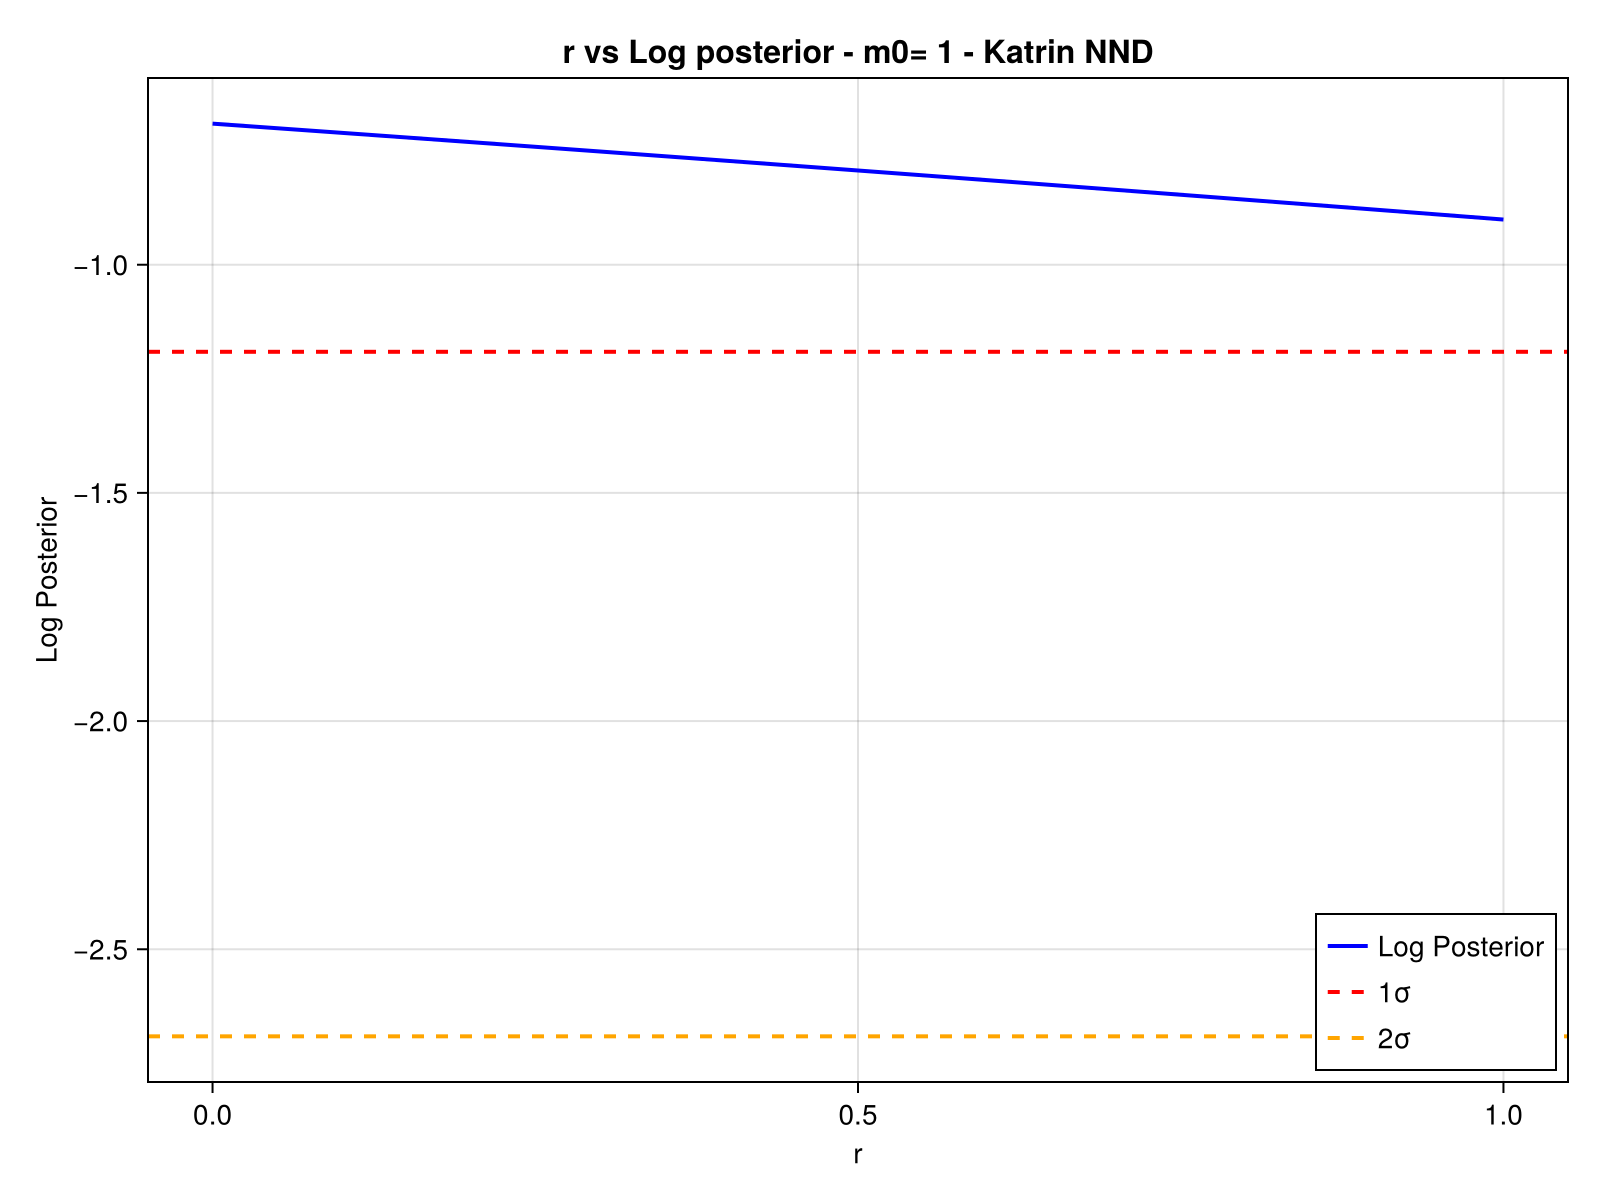

In [ ]:

#value of m0 fixed
m0fixed =1
m0max=2
m0index = round(Int, 31/m0max* m0fixed)
println("m0index: ", m0index)

#calsculate the best fit
bf = Newtrinos.bestfit(result)

# Calculate confidence intervals
sigma_1_threshold = maximum(result.values.log_posterior[:, m0index ]) - 0.5
sigma_2_threshold = maximum(result.values.log_posterior[:, m0index ]) - 2.0

# Create the plot
fig = Figure(resolution = (800, 600))
ax = Axis(fig[1, 1],
    xlabel = "r",
    ylabel = "Log Posterior",
    title = "r vs Log posterior - m0= $m0fixed - Katrin NND",
    titlesize = 16,
    xlabelsize = 14,
    ylabelsize = 14
)

# Plot the main curve
lines!(ax, result.axes.r, result.values.log_posterior[:, m0index],
    color = :blue,
    linewidth = 2,
    label = "Log Posterior"
)

# Add confidence level lines
hlines!(ax, [sigma_1_threshold], 
    color = :red, 
    linestyle = :dash, 
    linewidth = 2,
    label = "1σ"
)

hlines!(ax, [sigma_2_threshold], 
    color = :orange, 
    linestyle = :dash, 
    linewidth = 2,
    label = "2σ"
)

# Add legend
axislegend(ax, position = :rb)  # right bottom

display("image/png", fig)
save("/home/sofialon/Newtrinos.jl/profiled plot/katrin/katrin_rLogpost_NND_N=50_m0=$m0fixed.png", fig)
